In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mall_data = pd.read_csv('mall.csv',
                       names = ['Gender','Age', 'AnnualIncome', 'SpendingScore'],
                       index_col=0, header=1)
mall_data.head()

,Gender,Age,AnnualIncome,SpendingScore
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [4]:
features = mall_data[[ 'AnnualIncome','SpendingScore' ]]
features.head()

,AnnualIncome,SpendingScore
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76


In [5]:
X = np.array(features)
X[:10]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]])

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
possible_k_values = range(2,50)

In [9]:
sum_of_squared_distances = []

for k in possible_k_values:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(X)
    
    sum_of_squared_distances.append(k_means.inertia_)
    
sum_of_squared_distances[:20]

[180732.34851889685,
 105373.18846928165,
 72749.98793276899,
 43972.8507048507,
 36758.209767627006,
 29817.147793410295,
 24498.057386091008,
 21568.48749086995,
 19403.13070882606,
 17288.653982883476,
 15891.585861398824,
 14274.282706766917,
 12921.4569119477,
 11691.250575636954,
 10576.163721804513,
 9713.628190841553,
 9439.49103773621,
 8351.912213631778,
 8093.26262071262,
 7575.380148674854]

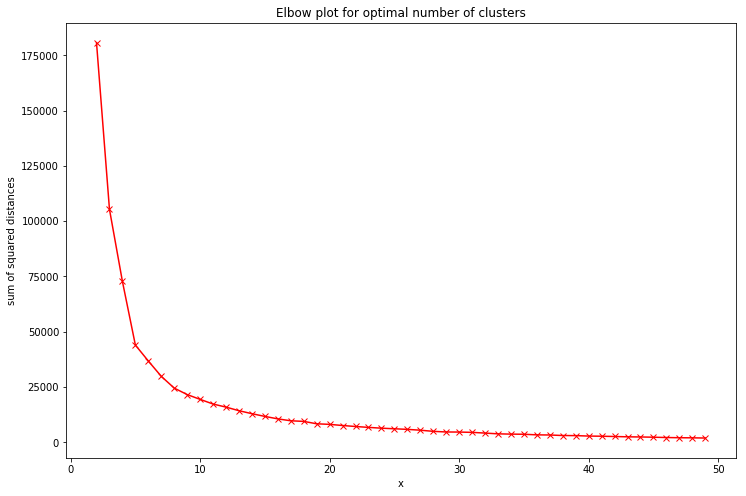

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(possible_k_values, sum_of_squared_distances, 'rx-')
plt.xlabel('x')
plt.ylabel('sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()

In [13]:
scores_df = pd.DataFrame({'k_value': possible_k_values,
                         'score': sum_of_squared_distances})
scores_df.head(10)

,k_value,score
0,2,180732.348519
1,3,105373.188469
2,4,72749.987933
3,5,43972.850705
4,6,36758.209768
5,7,29817.147793
6,8,24498.057386
7,9,21568.487491
8,10,19403.130709
9,11,17288.653983


In [20]:
def silhouette_score_kmeans(k, data):
    kmean = KMeans(n_clusters=k).fit(data)
    silhou_score = silhouette_score(data, kmean.labels_)
    return silhou_score

In [21]:
silhouette_score_per_k = []

for k in possible_k_values:
    silhou_score = silhouette_score_kmeans(k,X)
    silhouette_score_per_k.append(silhou_score)
    
silhouette_score_per_k[:20]

[0.29466438792935173,
 0.46824208542590284,
 0.4970171432340684,
 0.5552295017995841,
 0.5409873241007619,
 0.5282300585392127,
 0.45864024133970743,
 0.4576510366341817,
 0.4492198026012393,
 0.4366949424872719,
 0.42091356014628917,
 0.41596977016239917,
 0.4166211975752171,
 0.42157886666992295,
 0.41487291982165897,
 0.4243141000646118,
 0.42629202855945614,
 0.40970899681745426,
 0.4114878948823928,
 0.4212127004082779]

In [22]:
scores_df = pd.DataFrame({'k_value': possible_k_values,
                         'score':silhouette_score_per_k})
scores_df.head(10)

,k_value,score
0,2,0.294664
1,3,0.468242
2,4,0.497017
3,5,0.555230
4,6,0.540987
5,7,0.528230
6,8,0.458640
7,9,0.457651
8,10,0.449220
9,11,0.436695


In [23]:
scores_df.tail(10)

,k_value,score
38,40,0.445784
39,41,0.446750
40,42,0.435147
41,43,0.442442
42,44,0.424057
43,45,0.438737
44,46,0.444584
45,47,0.437913
46,48,0.427880
47,49,0.416965


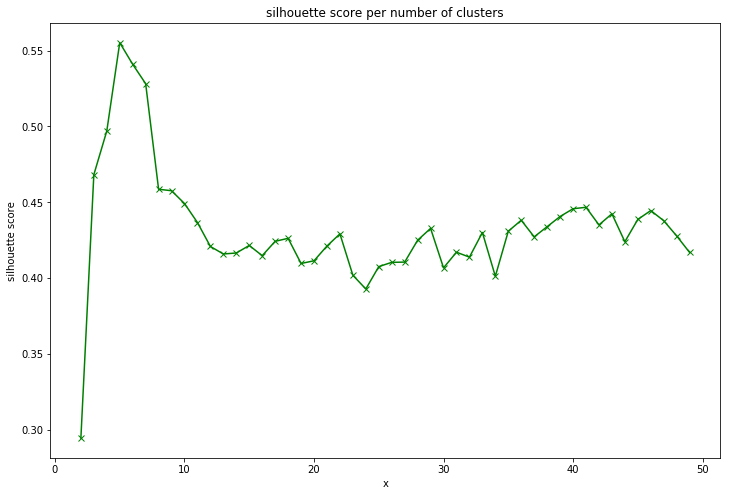

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(possible_k_values, silhouette_score_per_k, 'gx-')
plt.xlabel('x')
plt.ylabel('silhouette score')

plt.title('silhouette score per number of clusters')
plt.show()

In [26]:
max_score_index = scores_df[scores_df['score'] == max(scores_df['score'])].index[0]
scores_df.iloc[max_score_index]

k_value    5.00000
score      0.55523
Name: 3, dtype: float64

In [27]:
best_k_value = int(scores_df.iloc[max_score_index].k_value) 
best_k_value

5

In [28]:
from scipy.cluster import hierarchy

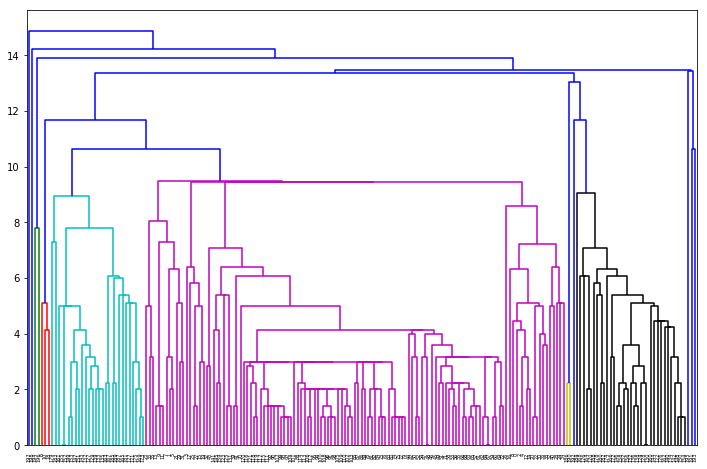

In [30]:
plt.figure(figsize=(12,8))
hierarchy.dendrogram(hierarchy.linkage(X, method='single'))
plt.show()

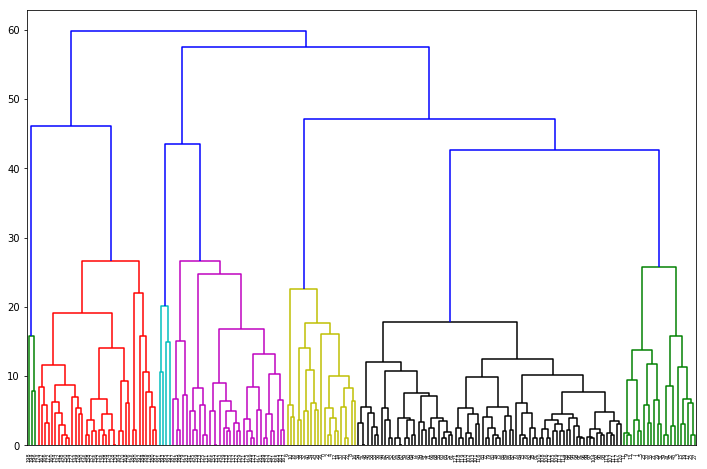

In [31]:
plt.figure(figsize=(12,8))
hierarchy.dendrogram(hierarchy.linkage(X, method='average'))
plt.show()

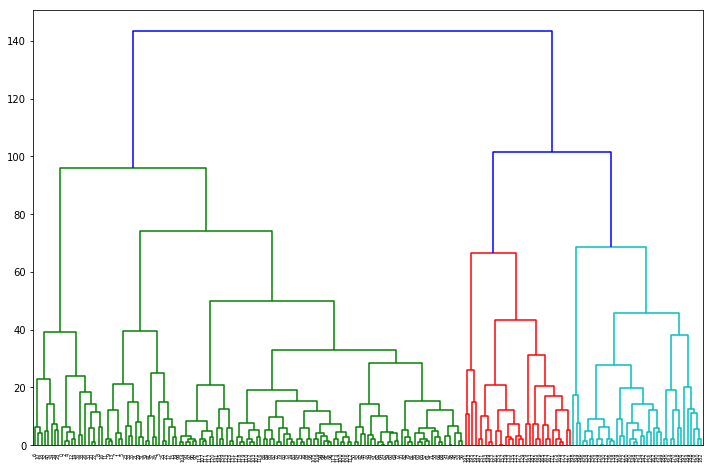

In [32]:
plt.figure(figsize=(12,8))
hierarchy.dendrogram(hierarchy.linkage(X, method='complete'))
plt.show()

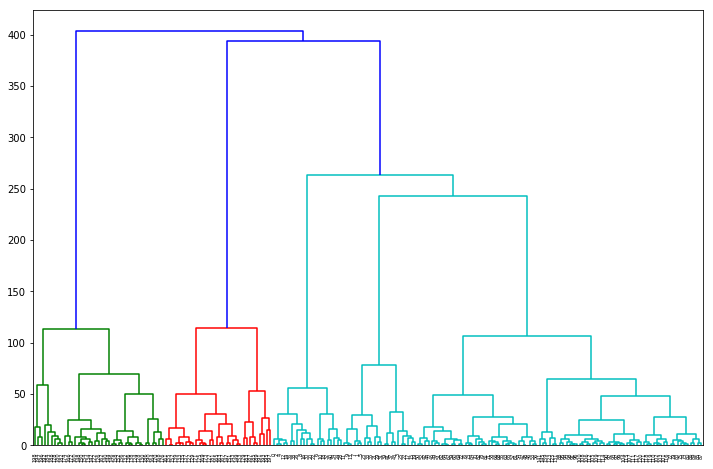

In [33]:
plt.figure(figsize=(12,8))
hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

possible_k_values = range(2,15)

def silhouette_score_agglomerative(k, data):
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(data)
    
    silhou_score = silhouette_score(data, agg.labels_)

    return silhou_score

In [36]:
silhouette_score_per_k = []

for k in possible_k_values:
    silhou_score = silhouette_score_agglomerative(k,X)
    silhouette_score_per_k.append(silhou_score)

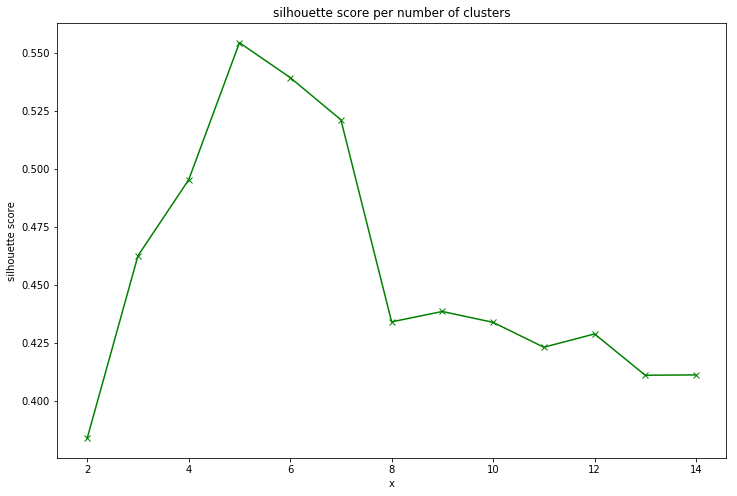

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(possible_k_values, silhouette_score_per_k, 'gx-')
plt.xlabel('x')
plt.ylabel('silhouette score')

plt.title('silhouette score per number of clusters')
plt.show()

In [38]:
from sklearn.cluster import MeanShift

possible_bw_values = range(1,30)

def silhouette_score_meanshift(bw, data):
    meanshift = MeanShift(bandwidth=bw).fit(data)
    
    silhou_score = silhouette_score(data, meanshift.labels_)

    return silhou_score

In [39]:
silhouette_score_per_bw = []

for bw in possible_bw_values:
    silhou_score = silhouette_score_meanshift(bw, X)

    silhouette_score_per_bw.append(silhou_score)

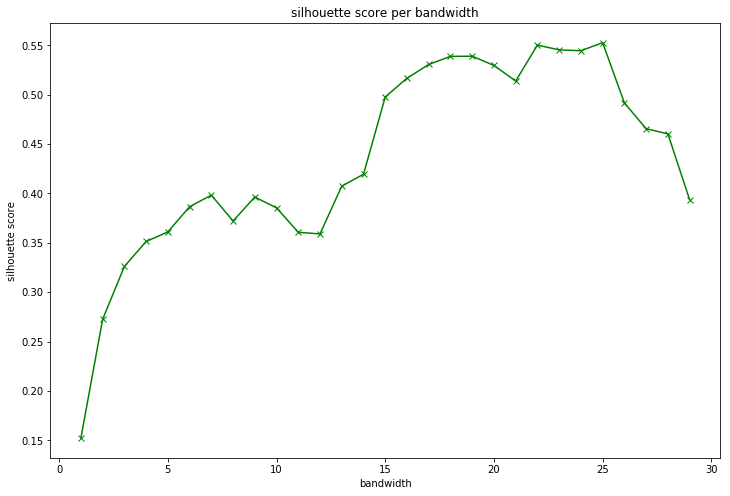

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(possible_bw_values, silhouette_score_per_bw, 'gx-')
plt.xlabel('bandwidth')
plt.ylabel('silhouette score')

plt.title('silhouette score per bandwidth')
plt.show()

In [42]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X, n_samples=15)
bandwidth

27.322161642835603